In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv (r'/content/drive/My Drive/Universidad Panamericana/Especialidad/Inteligencia de Negocios y Soluciones de Ciencias de Datos/Ejercicio Titanic/train.csv')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Limpieza de la base de datos**

In [ ]:
print('El número total de muestras es: {}.'.format(df.shape[0]))

El número total de muestras es: 891.


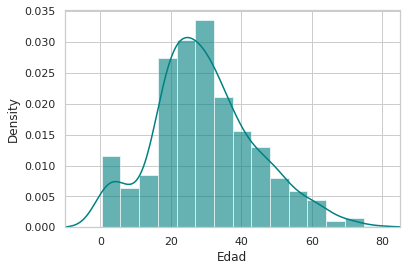

La media de edad es: 29.70
La mediana de la edad es:  is 28.00


In [ ]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Edad')
plt.xlim(-10,85)
plt.show()

# mean age
print('La media de edad es: %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('La mediana de la edad es:  is %.2f' %(df["Age"].median(skipna=True)))

In [ ]:
train_data = df.copy()

Pasajeros agrupados de acuerdo al lugar de abordaje (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


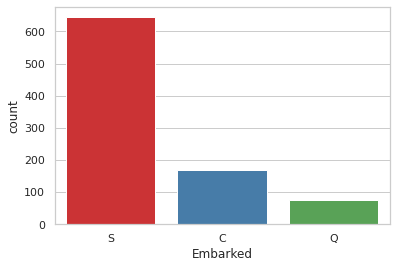

El puerto con mayor abordaje es: S.


In [ ]:
train_data["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
train_data.isnull().sum()

train_data.drop('Cabin', axis=1, inplace=True)

print('Pasajeros agrupados de acuerdo al lugar de abordaje (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set1')
plt.show()

print('El puerto con mayor abordaje es: %s.' %df['Embarked'].value_counts().idxmax())

train_data["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

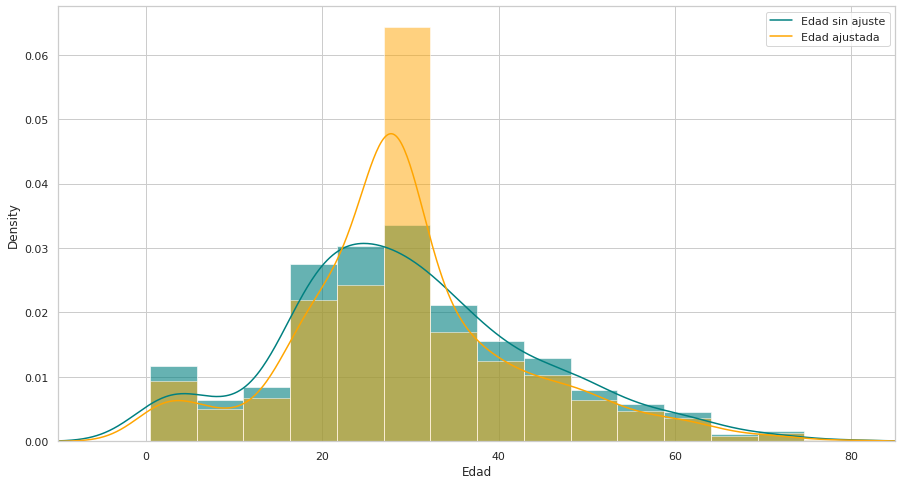

In [ ]:
plt.figure(figsize=(15,8))

#Edad sin ajuste
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')

#Edad con ajuste
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')

ax.legend(['Edad sin ajuste', 'Edad ajustada'])
ax.set(xlabel='Edad')
plt.xlim(-10,85)
plt.show()

In [ ]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


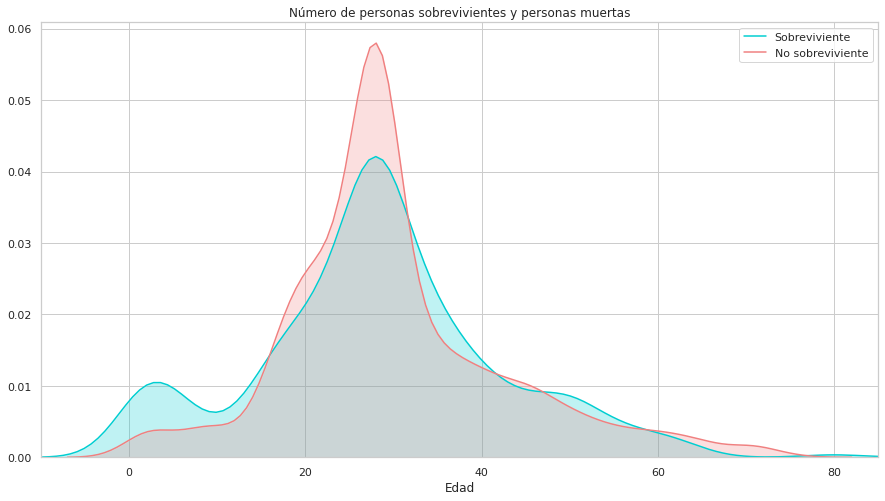

In [ ]:
df.head()

plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)

sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)

plt.legend(['Sobreviviente', 'No sobreviviente'])
plt.title('Número de personas sobrevivientes y personas muertas')
ax.set(xlabel='Edad')

plt.xlim(-10,85)
plt.show()

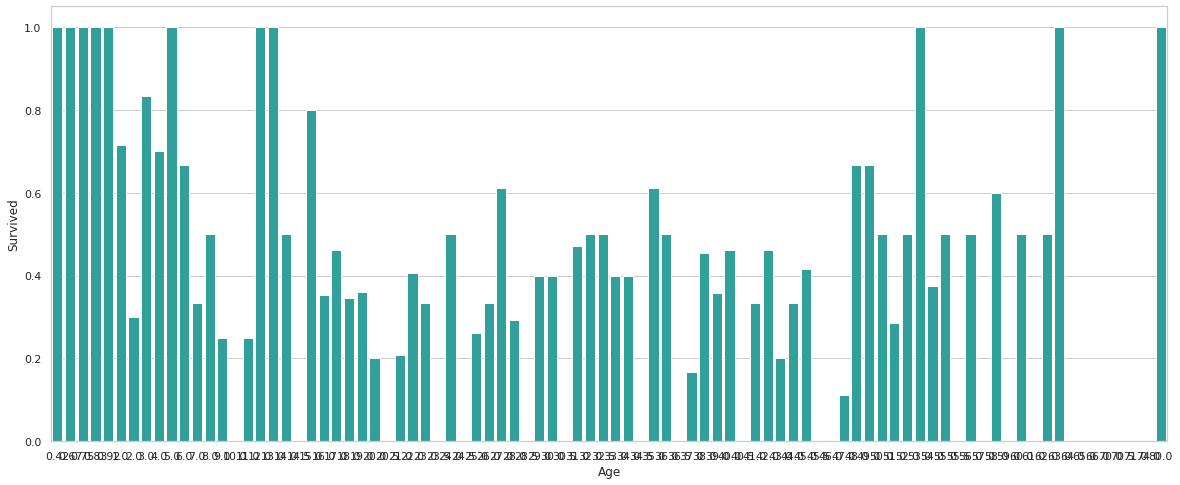

In [ ]:
plt.figure(figsize=(20,8))

avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()

g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [ ]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

In [ ]:
final_train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1,0
887,1,19.0,30.0000,1,1,0,0,0,0,1,0,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1,0


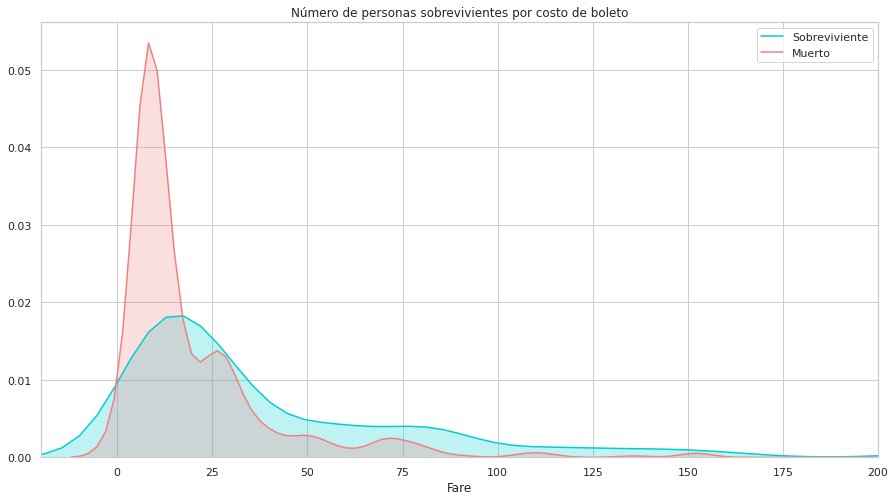

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)

sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)

plt.legend(['Sobreviviente', 'Muerto'])

plt.title('Número de personas sobrevivientes por costo de boleto')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **`Visualización de datos`**

# **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt


**Scatter plot**

Text(0, 0.5, 'Edad')

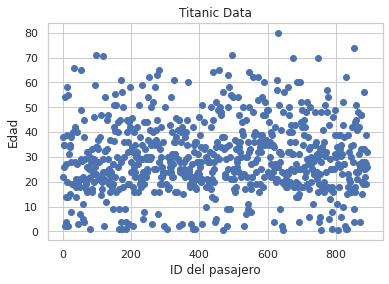

In [ ]:
#############Scatter plot################

#Creación de la figura y los ejes
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['PassengerId'], df['Age'])

# set a title and labels
ax.set_title('Titanic Data')
ax.set_xlabel('ID del pasajero')
ax.set_ylabel('Edad')


Text(0, 0.5, 'Edad')

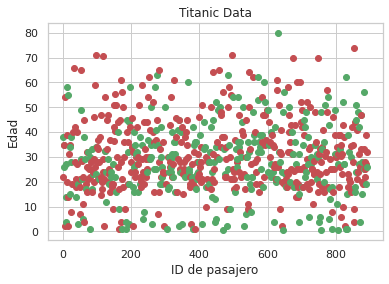

In [ ]:
# create color dictionary
colors = {0:'r', 1:'g'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(df['Age'])):
    ax.scatter(df['PassengerId'][i], df['Age'][i],color=colors[df['Survived'][i]])

# set a title and labels
ax.set_title('Titanic Data')
ax.set_xlabel('ID de pasajero')
ax.set_ylabel('Edad')

**Line plot**

Text(0.5, 1.0, 'Line plot')

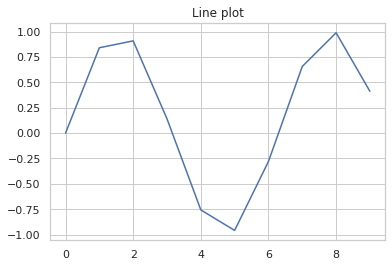

In [ ]:
x_data = range(0, 10)
y_data = np.sin(x_data)

fig, ax = plt.subplots()

ax.plot(x_data, y_data)
ax.set_title('Line plot')

**Histograma**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Número de personas')

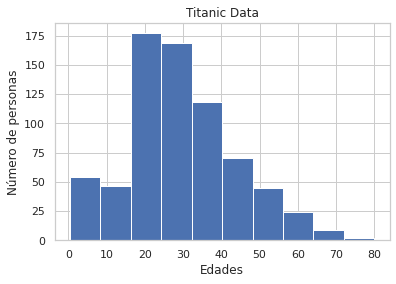

In [ ]:
# create figure and axis
fig, ax = plt.subplots()

# plot histogram
ax.hist(df['Age'])

# set title and labels
ax.set_title('Titanic Data')
ax.set_xlabel('Edades')
ax.set_ylabel('Número de personas')

Barras

Text(0, 0.5, 'Número de personas')

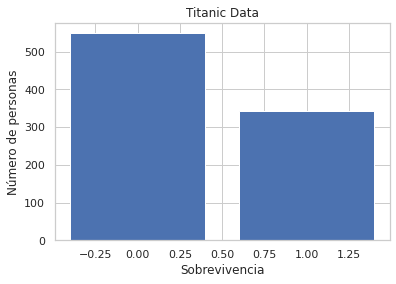

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df['Survived'].value_counts() 

# get x and y data 
points = data.index 
frequency = data.values 

# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Titanic Data') 
ax.set_xlabel('Sobrevivencia') 
ax.set_ylabel('Número de personas')

# **Pandas plot**

**Scatter**

**Line plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


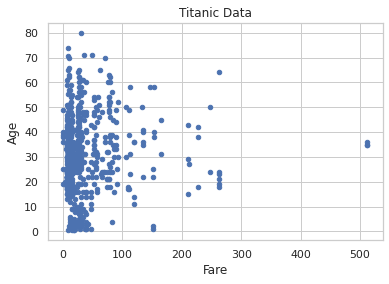

In [ ]:
df.plot.scatter(x='Fare', y='Age', title='Titanic Data')

**Line plot**

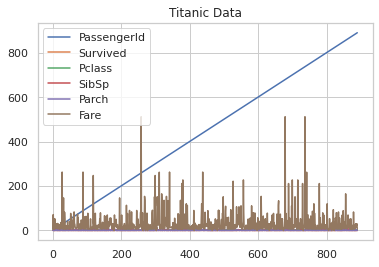

In [ ]:
df.drop(['Age'], axis=1).plot.line(title='Titanic Data')

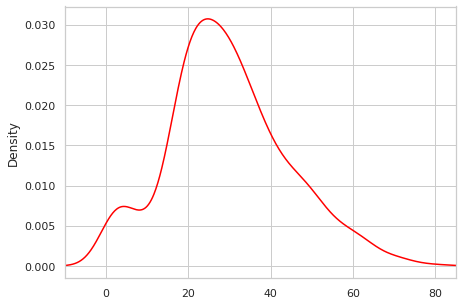

In [ ]:
#kind : str
#
#‘line’ : line plot (default)
#‘bar’ : vertical bar plot
#‘barh’ : horizontal bar plot
#‘hist’ : histogram
#‘box’ : boxplot
#‘kde’ : Kernel Density Estimation plot
#‘density’ : same as ‘kde’
#‘area’ : area plot
#‘pie’ : pie plot
#‘scatter’ : scatter plot
#‘hexbin’ : hexbin plot


plt.figure(figsize=(7,5))

ax = df["Age"]
df["Age"].plot(kind='density', color='red')

plt.xlim(-10,85)
plt.show()

**Histograma**

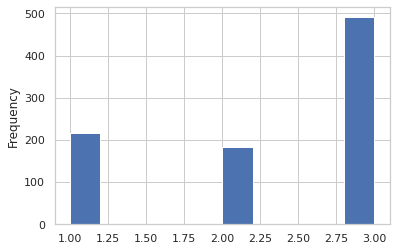

In [ ]:
df['Pclass'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec7a55f6d8>,
      dtype=object)

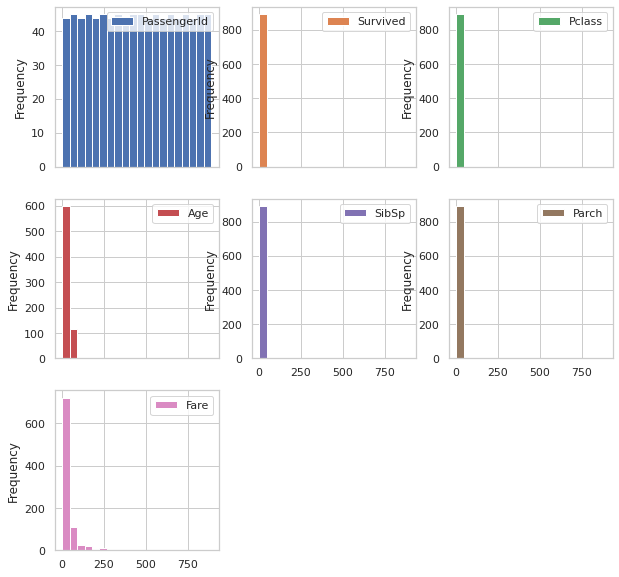

In [ ]:
df.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=20)

**Bar plot**

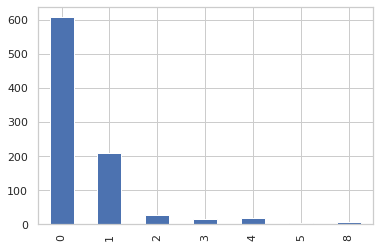

In [ ]:
df['SibSp'].value_counts().sort_index().plot.bar()

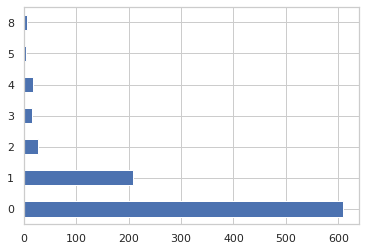

In [ ]:
df['SibSp'].value_counts().sort_index().plot.barh()

# **Seaborn**

In [ ]:
import seaborn as sns

**Scatter**

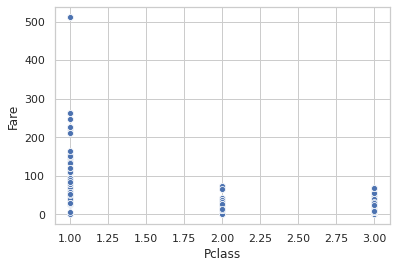

In [ ]:
sns.scatterplot(x='Pclass', y='Fare', data=df)

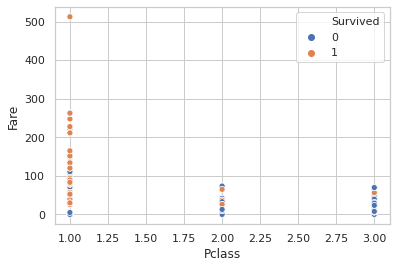

In [ ]:
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=df)

**Line chart**

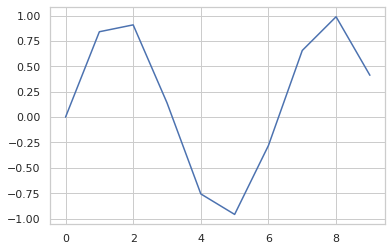

In [ ]:
x_data = range(0, 10)
y_data = np.sin(x_data)

sns.lineplot(data=y_data)

**Histograma**

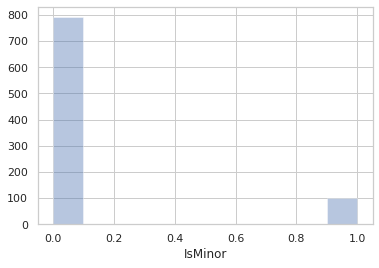

In [ ]:
sns.distplot(final_train['IsMinor'], bins=10, kde=False) #kenrel de densidad 'kde'

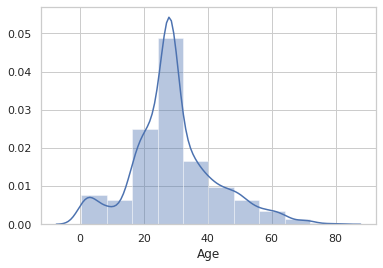

In [ ]:
sns.distplot(final_train['Age'], bins=10, kde=True)

**Bar plot**

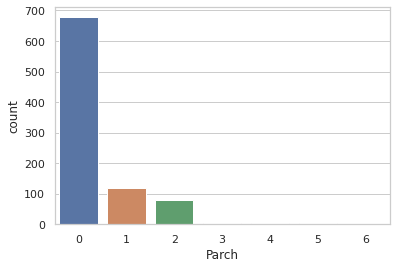

In [ ]:
sns.countplot(df['Parch'])

# **Otros tipos de visualizaciones**

**Boxplot**

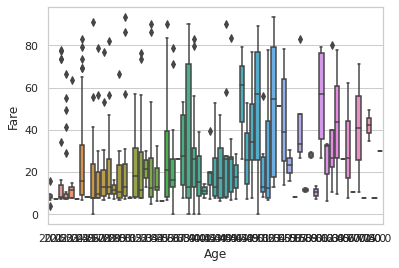

In [ ]:
dataf = df[(df['Age']>=20) & (df['Fare']<100)]
sns.boxplot('Age', 'Fare', data=dataf)

**Heatmap**

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

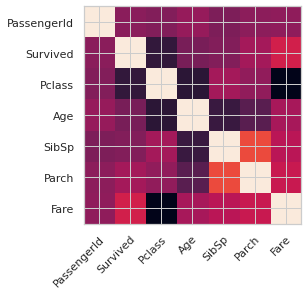

In [ ]:
import numpy as np

# get correlation matrix
corr = df.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

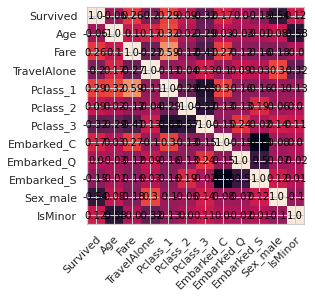

In [ ]:
# get correlation matrix
corr = final_train.corr()
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

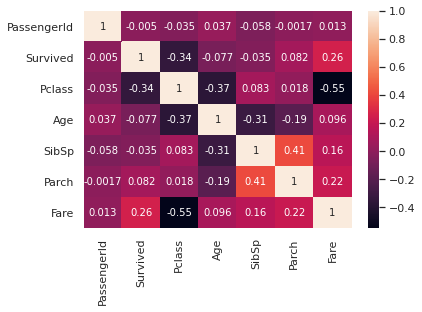

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Faceting**

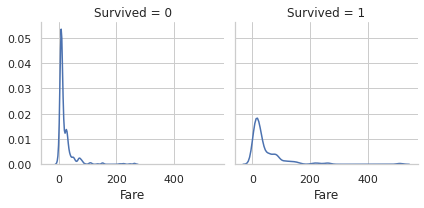

In [ ]:
g = sns.FacetGrid(df, col='Survived')

g = g.map(sns.kdeplot, 'Fare')

**Pairplot**

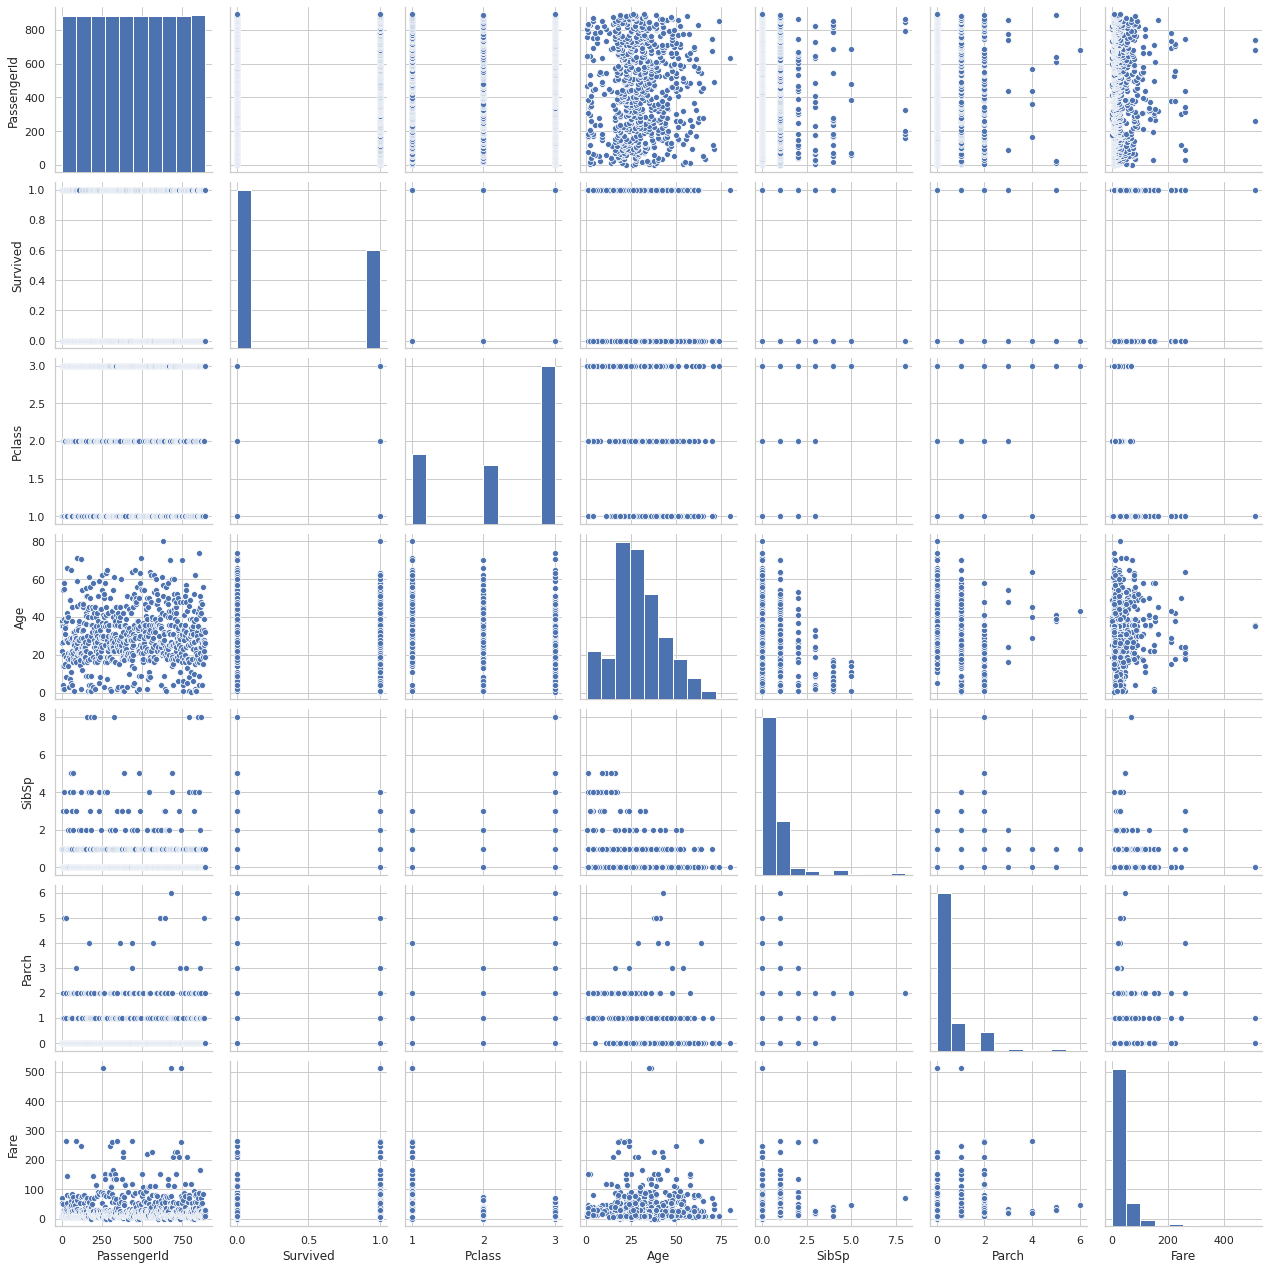

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec72ec5cc0>,
      dtype=object)

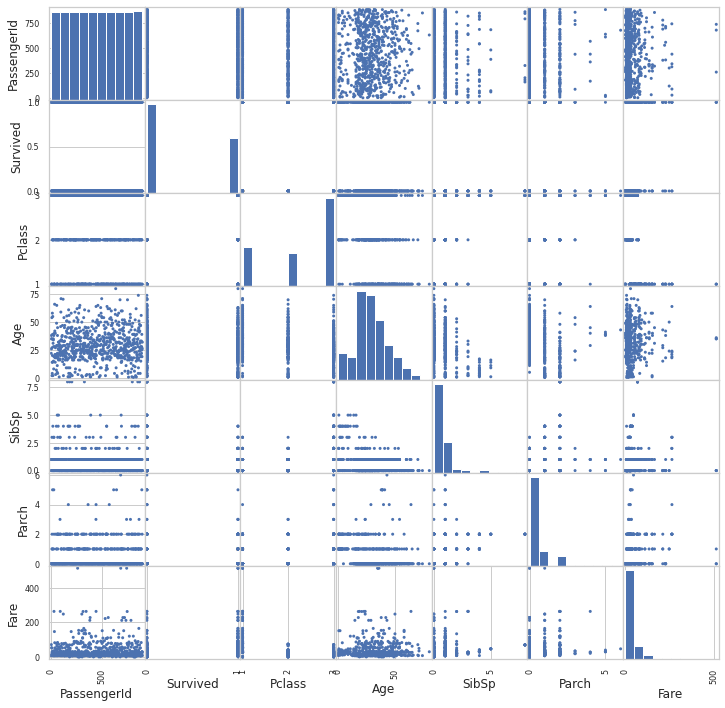

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df, alpha=1, ax=ax)